In [623]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
user_col = ['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J']
data = pd.read_table("abalone.data" , sep = ',', header = None, names = user_col)

In [624]:
data

,A,B,C,D,F,G,H,I,J
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [109]:
data['A'].unique()

array(['M', 'F', 'I'], dtype=object)

In [110]:
data['A'].value_counts()

M    1528
I    1342
F    1307
Name: A, dtype: int64

In [111]:
data.A = pd.Categorical(data.A).codes

In [112]:
data

,A,B,C,D,F,G,H,I,J
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [113]:
data['A'].value_counts()

2    1528
1    1342
0    1307
Name: A, dtype: int64

In [719]:
class kNNClassification:
    
    def __init__(self):
        
        np.random.seed(0)
        pass
    
    def normalise_data(self, X):
        
        min_max_scaler = preprocessing.MinMaxScaler()
        X_scaled = min_max_scaler.fit_transform(X)
        
        return X_scaled
    
    def forward_pass(self, X, W):
        
        return np.multiply(X, W)
    
    def error_normal(self, X, W):
        
        #print("normal:", np.sum(np.sqrt((self.forward_pass(X, W) - X) **2)))
        return np.sqrt((self.forward_pass(X, W) - X) **2)
    
    def error_l1_norm(self, X, W, rho1):
        
        #print("rho1:", rho1)
        #print("l1:", np.sum(np.sqrt((self.forward_pass(X, W) - X) **2) + rho1 * np.sqrt(W**2)))
        return np.sqrt((self.forward_pass(X, W) - X) **2) + rho1 * np.sqrt(W**2)
    
    def error_l2_norm(self, X, W, rho2):
        
        #print("rho2:", rho2)
        #print("l2:", np.sum(np.sqrt((self.forward_pass(X, W) - X) **2) + rho2 * abs(W)))
        return np.sqrt((self.forward_pass(X, W) - X) **2) + rho2 * abs(W)
    
    def loss(self, X, W):
        
        return np.sum(self.error_normal( X, W)) / X.shape[0]
    
    def grad_normal(self, X):
        
        return X
    
    def grad_l1_norm(self, X, W, rho1):
        
        if rho1 == 0:
            return X
        else:
            return X + 2*W
    
    def grad_l2_norm(self, X, rho2):
        
        if rho2 == 0:
            return X
        else:
            return X + 1
    
    def fit(self, X, epochs = 150, mini_batch_size = 32, learning_rate = 0.01, 
            method = "Normal", rho1 = 1, rho2 = 1, display_loss = True):
        
        m = X.shape[0]
        X = self.normalise_data(X)
        W = np.random.randn(X.shape[0], X.shape[1])
        Loss  = []
        if method == "Normal":
            #print("Weights:",np.sum(W))
            for i in tqdm(range(epochs)):
                for i in range(0, m, mini_batch_size):
                    self.error_normal(X[i:i+mini_batch_size], W[i:i+mini_batch_size])
                    W[i:i+mini_batch_size] += learning_rate * self.grad_normal(X[i:i+mini_batch_size])
                Loss.append(self.loss(X, W))
                
        elif method == "l1-norm":
            #print("Weights:",np.sum(W))
            for i in tqdm(range(epochs)):
                for i in range(0, m, mini_batch_size):
                    self.error_l1_norm(X[i:i+mini_batch_size], W[i:i+mini_batch_size], rho1)
                    W[i:i+mini_batch_size] -= learning_rate * self.grad_l1_norm(X[i:i+mini_batch_size], W[i:i+mini_batch_size],
                                                                               rho1)
                Loss.append(self.loss(X, W))
            
        elif method == "l2-norm":
            #print("Weights:",np.sum(W))
            for i in tqdm(range(epochs)):
                for i in range(0, m, mini_batch_size):
                    self.error_l2_norm(X[i:i+mini_batch_size], W[i:i+mini_batch_size], rho2)
                    W[i:i+mini_batch_size] += learning_rate * self.grad_l2_norm(X[i:i+mini_batch_size], rho2)
                Loss.append(self.loss(X, W))
                    
            
        if display_loss:
            plt.style.use('ggplot')
            plt.figure(figsize = (10, 8))
            plt.plot(Loss, '-o', markersize = 5)
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.show()
        return W, min(Loss)

100%|███████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 190.19it/s]


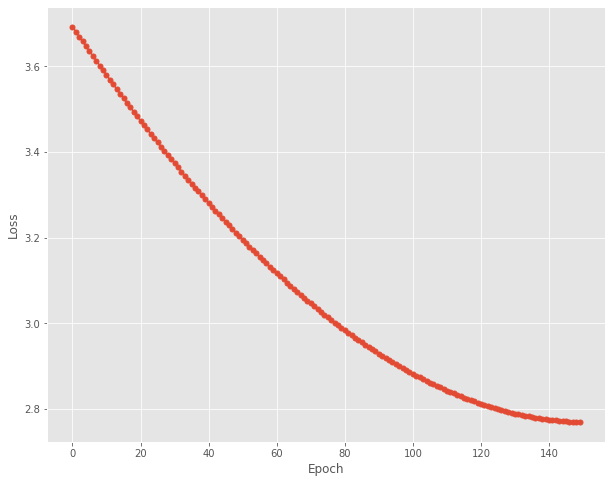

Minimum Loss Normal: 2.769168757332966


In [720]:
model = kNNClassification()
Weights_normal, loss_normal = model.fit(X, epochs = 150, mini_batch_size = 32, method = "Normal")
print("Minimum Loss Normal:", loss_normal)

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 151.92it/s]


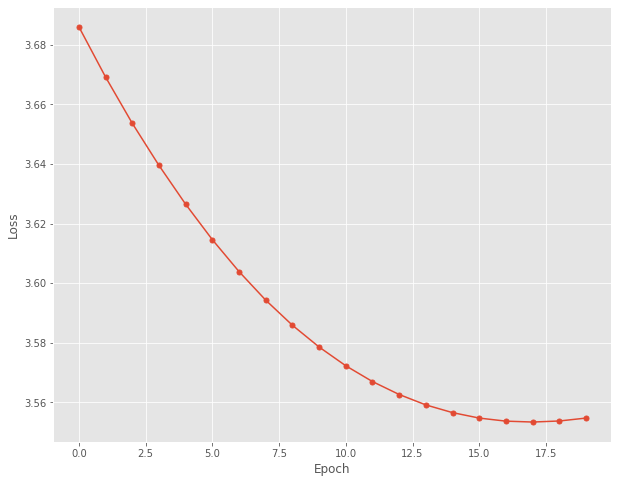

Minimum L1 Loss: 3.553369489086008


In [723]:
model = kNNClassification()
Weights_l1_norm, loss_l1 = model.fit(X, epochs = 20, mini_batch_size = 32, method = "l1-norm", rho1 = 1)
print("Minimum L1 Loss:", loss_l1)

100%|█████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 131.77it/s]


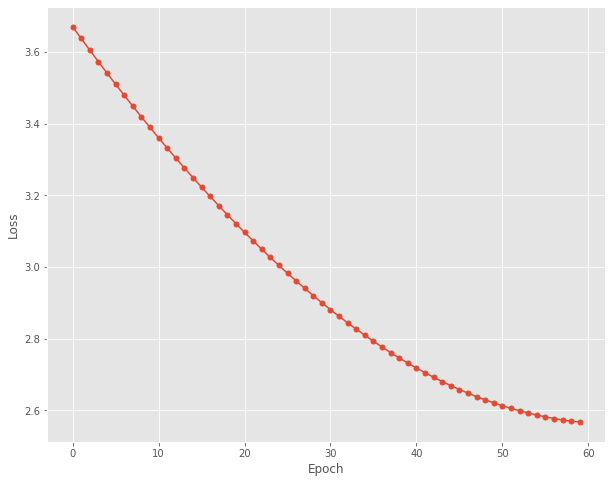

Minimum Loss_l2: 2.567423722704745


In [722]:
model = kNNClassification()
Weights_l2_norm, loss_l2 = model.fit(X, epochs = 60, mini_batch_size = 32, method = "l2-norm", rho2 = 1)
print("Minimum Loss_l2:", loss_l2)

In [724]:
Weights_l2_norm

array([[ 2.96405235,  1.30826532,  1.89134303, ...,  1.62948276,
         0.53743203,  0.79678115],
       [ 1.6105985 ,  0.96701654,  2.26603821, ...,  0.97159401,
         2.13503572,  0.52341316],
       [ 0.9130677 ,  0.11482318, -1.58492259, ...,  2.9811437 ,
        -0.729702  ,  0.81718709],
       ...,
       [ 0.49787954,  1.72387786,  0.3971485 , ...,  0.14121334,
        -0.67132134,  2.89679986],
       [ 1.25913515,  2.13867422,  2.28622322, ..., -1.48880608,
         0.72583038,  2.32316469],
       [ 0.65900025,  2.28759904,  0.56419658, ...,  0.22224424,
         1.4677485 ,  1.94813537]])

In [725]:
Weights_l2_norm[1]

array([1.6105985 , 0.96701654, 2.26603821, 1.40882534, 0.76916926,
       1.08360768, 0.97159401, 2.13503572, 0.52341316])